# Regression and regularisation

 - Regression is used when prediction a continuous dependent variable using one ore more independent variables.
 - Classical regression is not working well when the number of features is large or when the data contains plenty of noise or the dependency is non-linear
 - Application areas of classical regression can be extended by using regularisation
 - Non-linear regression models SVR, RFR, GBRT
 - Recursive feature elimination/addition are useful methods for model optimisation and feature selection 


## Ordinary Least mean Squares (OLS) regression

 - OLS using p-features $x_i$ to predict variable $y$.
 - $x_i$ are called as independent variables
 - $y$ is called as a dependent variable
 - $\beta_i$ are the model parameters
 - $\beta_0$ is the intersection, which is not always modeled
 
$$
    \hat{y}_i = \beta_0 + \beta_1 x_{i,1} + \beta_2 x_{i,2} + \beta_3 x_{i,3} + \cdots + \beta_p x_{i,p} + \epsilon_i
$$

Cost function to be minimized (square error):
$$
   Obj(\Theta) = L(\Theta) = \sum_{i=1}^{n} (y_i - \sum_{j=1}^p \beta_j x_{ij})^2
$$

This Classic regression, usually the first choice to be tested. It Does not work well when **p is large** and when the training data contains **plenty of noise**

The **prediction** with the model is the following:

$$  \hat{y} = \beta_0 + \beta_1 x_1 + \beta_2 x_2, ..., \beta_n x_n + \epsilon$$

In 1-dimensional case, the regression is simply

$$  \hat{y} = \beta_0 + \beta_1 x + \epsilon$$,

where $\beta_1$ is the reciprocal and $\beta_0$ is the constant (the y-axis crossing point) and $\epsilon$ is the prediction error. The optimal solution is when the squared sum of error (Loss function, $L()$) between predicted and true values is minimized:

$$
   L(\beta) = \sum_{i=1}^{n} (y_i - \hat{y})^2
$$

The linear regression has a well known solution, which can be calculated very efficiently (closed form):

$$
   \beta = (\mathbf{X}^T\mathbf{X})^{-1}\mathbf{X}^T Y,
$$

Where $\mathbf{X}$ is a design matrix containing data samples in rows, and variables in columns. It is also called as design matrix, at it was shown in the top of this section.

## The fitness of a regression model

The fitness of a regression model is often estimated using coefficient of determination ($R^2$) or Root Mean Square Error of prediction (RMSE).

### Coefficient of determination, $R^2$
The [coefficient of determination](https://en.wikipedia.org/wiki/Coefficient_of_determination), $R^2$, defines how large proportion of the variance in $y$ is explained by the model. $R^2$ is zero if the model cannot predict anything and it is 1 when the model fit is perfect. 

$$
    R^2 = 1- \frac{\mathrm{var(residual)}}{\mathrm{var}(y)} = 1- \frac{\Sigma_{i=1}^{n} (y_i - \hat{y}_i)^2}{\Sigma_{i=1}^{n} (y_i - \bar{y})^2}
$$

For Ordinary Least mean Squares regression models (OLS) it is the same as the square of the Pearson correlation coefficient.

$$
   R^2 = \rho^2
$$

### Root Mean Square Error, RMSE
[RMSE](https://towardsdatascience.com/what-does-rmse-really-mean-806b65f2e48e), is another often used measure for model fitness. RMSE shows the average prediction error in the same units and scale than $y$.

$$
   \mathrm{RMSE} = \sqrt{ \left( \frac{\sum_{i=i}^{n} (y_i - \hat{y}_i)^2}{n} \right) }
$$

## Regularization and model simplicication
![William_of_Ockham_-_Logica_1341.jpg](kuvat/William_of_Ockham_-_Logica_1341_s.jpg)

<span id="kuvaviite">Ockham - from a manuscipt of Ockham's Summa Logicae, MS Gonville and Caius College, Cambridge, 464/571, fol. 69r</span>

> "Simpler solutions are more likely to be correct than complex ones"
>
        >William of Ockham

Finding a model which fits to the data is not necessarily optimal. It may be unnecessary complex, which can cause problems in:
 - Generalization: too complex models may have unnecessary complex decision boundary or use redundant or unimportant variables in a regression model, which are producing noise to the model. The model may event fit to the noise in the training data, which is not repeated similarly in new samples.
 - Explainability: A complex model is difficult to understand, explain and believe.
 - Stability: Too complex model may have problems in converging in noisy training data and also the prediction can be too noise sensitive
 - Unnecessary high dimensionality means costs in recording, transferring, storing and processing data

Therefore it is important to use means for simplifying data and making the models more stable.


### L2 regularization, Ridge regression
$$
   Obj(\Theta) = \underbrace{\sum_{i=1}^{n} (y_i - \sum_{j=1}^p \beta_j x_{ij})^2}_{L(\Theta)} + \underbrace{\lambda \sum_{j=1}^p \beta_j^2}_{\Omega(\Theta)}
$$

* Regularization term, $\Omega(\Theta)$, makes it suitable for higher dimensional data
* Minimal unbiased estimator in certain cases
* Can be solved in closed form
* All coefficients are always kept -> **Does not provide a parsimonious model**

-------
<div class=citation>
Hoerl, Arthur E., ja Robert W. Kennard. ”Ridge Regression: Biased Estimation for Nonorthogonal Problems”. Technometrics 12, nro 1 (1. Feb 1970): 55–67. https://doi.org/10.1080/00401706.1970.10488634.
</div>

### L1 regularization, LASSO
$$
   Obj(\Theta) = \underbrace{\sum_{i=1}^{n} (y_i - \sum_{j=1}^p \beta_j x_{ij})^2}_{L(\Theta)} + \lambda \sum_{j=1}^p |\beta_j|
$$

* L1 regularization tends to lead solutions where many coefficients, $\beta_i$ will be zeros -> **sparse model**.
* Only iterative solutions are available, but for example <a href="https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LassoLars.html">Least Angle Regression</a> (LARS) is fast method for finding LASSO solution
* Will saturate if p>n, and select at maximum n feautures
* in cases where n>p and high correlation between predictors, L1 is worse than L2

-----
<div class="citation">Tibshirani, Robert. ”Regression Shrinkage and Selection Via the Lasso”. Journal of the Royal Statistical Society: Series B (Methodological) 58, nro 1 (1996): 267–88. https://doi.org/10.1111/j.2517-6161.1996.tb02080.x.
</div>

### Elastic nets
$$
   Obj(\Theta) = \underbrace{\sum_{i=1}^{n} (y_i - \sum_{j=1}^p \beta_j x_{ij})^2}_{L(\Theta)} + \lambda \sum_{j=1}^p \left( (1-\alpha) \beta_i^2 + \alpha |\beta_j| \right)
$$

* Elastic net can perform like Rigde regression, when $\alpha$=0 or like LASSO when $\alpha$=1
* For suitable value of, $\alpha$, elastic net will also produce sparse model, but it does not saturate to in cases when n<p like LASSO.
* Can tolerate correlation between predictors
* Can be computed interatively quite efficiently



<div class="citation">Zou, Hui, ja Trevor Hastie. ”Regularization and variable selection via the elastic net”. Journal of the Royal Statistical Society: Series B (Statistical Methodology) 67, nro 2 (1. April 2005): 301–20. https://doi.org/10.1111/j.1467-9868.2005.00503.x.</div>


### Gradient Tree Boosting 
 - Also called as Gradient Boosted Regression Trees (GBRT)
 - The GBRT has similar formal loss function and measure for complexity as linear regrssion
 
 $$Obj(\Theta) = \underbrace{L(\Theta)}_{Training Loss} + \underbrace{\Omega(\Theta)}_{Regularization}$$
 
 

## Coding examples

Pay attention especially for these rows 

 - Build the model:

`    
model = Model(<model parameters>).fit(X,y)
`

 - Validate the model with R2 score in testing set and calculating Cross validation R2 score or R2 score and finaly for a separate testing set:

`    
model.score(X,y)
model.cross_val_score(model, X, y, cv=5).mean()
model.score(X_test, y_test)
`

 - Variable selection:
 
`    
sfm = SelectFromModel(model, threshold=0.3)
cross_val_score(model, sfm.transform(X), y, cv=5).mean()
model.score(sfm.transform(X),y)
`

 - Recursive feature selection
 
`    
rfe = RFE(estimator=model, n_features_to_select=1, step=1)
`

### Housing prize example

Can the house prizes be predicted? Which parameters affect most to the house prizes?

- LotFrontage, Linear feet of street connected to property
- LotArea, Lot size in square feet
- OverallQual, Rates the overall material and finish of the house
- OverallCond, Rates the overall condition of the house
- YearBuilt, Original construction date
- YearRemodAdd, Remodel date
- BsmtFinSF1, Type 1 finished square feet (Basement)
- BsmtFinSF2, Type 2 finished square feet (Basement)
- BsmtUnfSF, Unfinished square feet of basement area
- TotalBsmtSF, Total square feet of basement area
- 1stFlrSF, First Floor square feet
- 2ndFlrSF, Second floor square feet
- LowQualFinSF, Low quality finished square feet (all floors)
- GrLivArea, Above grade (ground) living area square feet
- BsmtFullBath, Basement full bathrooms
- BsmtHalfBath, Basement half bathrooms
- FullBath, Full bathrooms above grade
- HalfBath, Half baths above grade
- BedroomAbvGr, Bedrooms above grade
- KitchenAbvGr, Kitchens above grade
- TotRmsAbvGrd, Total rooms above grade
- Fireplaces, Number of fireplaces
- GarageYrBlt, Year garage was built
- GarageCars, Size of garage in car capacity
- GarageArea, Size of garage in square feet
- WoodDeckSF, Wood deck area in square feet
- OpenPorchSF, Open porch area in square feet
- EnclosedPorch, Enclosed porch area in square feet
- 3SsnPorch, Three season porch area in square feet
- ScreenPorch, Screen porch area in square feet
- PoolArea, Pool area in square feet
- YrSold, Year Sold (YYYY)

In [340]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, LassoCV, ElasticNetCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.feature_selection import SelectFromModel
import seaborn as sns
from sklearn.model_selection import cross_val_score
import pandas as pd

def rmse(yh,y):
    """Calculates the RMS error between yh and y. Note yh and y must be numpy arrays."""
    return np.sqrt(np.mean((yh-y)**2))

In [107]:
from sklearn.datasets import fetch_openml
housing = fetch_openml(name="house_prices", as_frame=True)
Housing=housing['data']

In [92]:
#X= scaler.fit_transform(housing['data'])
Xorig= housing['data']
y= housing['target']
Housing = pd.DataFrame(data=Xorig, columns=housing['feature_names'])
Housing['target'] = y
print(Housing.shape)
Housing.head()

(1460, 81)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,target
0,1.0,60.0,RL,65.0,8450.0,Pave,None,Reg,Lvl,AllPub,...,0.0,None,None,None,0.0,2.0,2008.0,WD,Normal,208500.0
1,2.0,20.0,RL,80.0,9600.0,Pave,None,Reg,Lvl,AllPub,...,0.0,None,None,None,0.0,5.0,2007.0,WD,Normal,181500.0
2,3.0,60.0,RL,68.0,11250.0,Pave,None,IR1,Lvl,AllPub,...,0.0,None,None,None,0.0,9.0,2008.0,WD,Normal,223500.0
3,4.0,70.0,RL,60.0,9550.0,Pave,None,IR1,Lvl,AllPub,...,0.0,None,None,None,0.0,2.0,2006.0,WD,Abnorml,140000.0
4,5.0,60.0,RL,84.0,14260.0,Pave,None,IR1,Lvl,AllPub,...,0.0,None,None,None,0.0,12.0,2008.0,WD,Normal,250000.0


In [323]:
# Find all non-numerical columns
Housing_num = Housing.copy()
for column in Housing.columns:
    if type(Housing[column][0])!=np.float64:
        print(column, type(Housing[column][0]), "Drop")
        Housing_num.drop(column, axis=1, inplace=True)
    else:
        print(column, type(Housing[column][0]), "Keep")
        

Id <class 'numpy.float64'> Keep
MSSubClass <class 'numpy.float64'> Keep
MSZoning <class 'str'> Drop
LotFrontage <class 'numpy.float64'> Keep
LotArea <class 'numpy.float64'> Keep
Street <class 'str'> Drop
Alley <class 'NoneType'> Drop
LotShape <class 'str'> Drop
LandContour <class 'str'> Drop
Utilities <class 'str'> Drop
LotConfig <class 'str'> Drop
LandSlope <class 'str'> Drop
Neighborhood <class 'str'> Drop
Condition1 <class 'str'> Drop
Condition2 <class 'str'> Drop
BldgType <class 'str'> Drop
HouseStyle <class 'str'> Drop
OverallQual <class 'numpy.float64'> Keep
OverallCond <class 'numpy.float64'> Keep
YearBuilt <class 'numpy.float64'> Keep
YearRemodAdd <class 'numpy.float64'> Keep
RoofStyle <class 'str'> Drop
RoofMatl <class 'str'> Drop
Exterior1st <class 'str'> Drop
Exterior2nd <class 'str'> Drop
MasVnrType <class 'str'> Drop
MasVnrArea <class 'numpy.float64'> Keep
ExterQual <class 'str'> Drop
ExterCond <class 'str'> Drop
Foundation <class 'str'> Drop
BsmtQual <class 'str'> Drop
Bs

In [325]:
print(housing['DESCR'])

Ask a home buyer to describe their dream house, and they probably won't begin with the height of the basement ceiling or the proximity to an east-west railroad. But this playground competition's dataset proves that much more influences price negotiations than the number of bedrooms or a white-picket fence.

With 79 explanatory variables describing (almost) every aspect of residential homes in Ames, Iowa, this competition challenges you to predict the final price of each home.

MSSubClass: Identifies the type of dwelling involved in the sale.	

        20	1-STORY 1946 & NEWER ALL STYLES
        30	1-STORY 1945 & OLDER
        40	1-STORY W/FINISHED ATTIC ALL AGES
        45	1-1/2 STORY - UNFINISHED ALL AGES
        50	1-1/2 STORY FINISHED ALL AGES
        60	2-STORY 1946 & NEWER
        70	2-STORY 1945 & OLDER
        75	2-1/2 STORY ALL AGES
        80	SPLIT OR MULTI-LEVEL
        85	SPLIT FOYER
        90	DUPLEX - ALL STYLES AND AGES
       120	1-STORY PUD (Planned Unit Development) - 1

In [326]:
 # Categorical fields
categorical_features=["MSSubClass", "MSZoning", "Street", "Alley", "LotShape", "LandContour", 
                     "Utilities", "LotConfig", "LandSlope", "Neighborhood", "Condition1", 
                     "Condition2", "BldgType", "HouseStyle", "RoofStyle", "RoofMatl", "Exterior1st", 
                     "Exterior2nd", "MasVnrType", "MasVnrArea", "ExterQual", "ExterCond", "Foundation", 
                     "BsmtQual", "BsmtCond", "BsmtExposure", "BsmtFinType1", "BsmtFinType2", "Heating", 
                     "HeatingQC", "CentralAir", "Electrical", "KitchenQual", "Functional", "FireplaceQu", 
                     "GarageType", "GarageFinish", "GarageQual", "GarageCond", "PavedDrive", "PoolQC", 
                     "Fence", "MiscFeature", "MiscVal", "MoSold", "SaleCondition", "SaleType"]

# Remove categorical features, since OLS cannot use them
Housing_noncat = Housing.copy()
for column in categorical_features:
    Housing_noncat.drop(column, axis=1, inplace=True)

Housing_noncat.head()

,Id,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,YrSold
0,1.0,65.0,8450.0,7.0,5.0,2003.0,2003.0,706.0,0.0,150.0,...,2003.0,2.0,548.0,0.0,61.0,0.0,0.0,0.0,0.0,2008.0
1,2.0,80.0,9600.0,6.0,8.0,1976.0,1976.0,978.0,0.0,284.0,...,1976.0,2.0,460.0,298.0,0.0,0.0,0.0,0.0,0.0,2007.0
2,3.0,68.0,11250.0,7.0,5.0,2001.0,2002.0,486.0,0.0,434.0,...,2001.0,2.0,608.0,0.0,42.0,0.0,0.0,0.0,0.0,2008.0
3,4.0,60.0,9550.0,7.0,5.0,1915.0,1970.0,216.0,0.0,540.0,...,1998.0,3.0,642.0,0.0,35.0,272.0,0.0,0.0,0.0,2006.0
4,5.0,84.0,14260.0,8.0,5.0,2000.0,2000.0,655.0,0.0,490.0,...,2000.0,3.0,836.0,192.0,84.0,0.0,0.0,0.0,0.0,2008.0


In [208]:
Housing_noncat.describe()

,Id,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,YrSold
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,443.639726,46.549315,567.240411,...,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,2007.815753
std,421.610009,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,456.098091,161.319273,441.866955,...,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,1.328095
min,1.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2006.000000
25%,365.750000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,223.000000,...,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2007.000000
50%,730.500000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,383.500000,0.000000,477.500000,...,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,2008.000000
75%,1095.250000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,712.250000,0.000000,808.000000,...,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,2009.000000
max,1460.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,5644.000000,1474.000000,2336.000000,...,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,2010.000000


In [209]:
# Replace not a numbers
Housing_noncat.LotFrontage.fillna(value=0, inplace=True)
mean_garage_year = Housing_noncat.GarageYrBlt.mean()
Housing_noncat.GarageYrBlt.fillna(value=mean_garage_year, inplace=True)

In [301]:
X= scaler.fit_transform(Housing_noncat.values)
y=housing['target']


CV score.......... 0.7795
Training score.... 0.8047
Training RMSE.....  35093


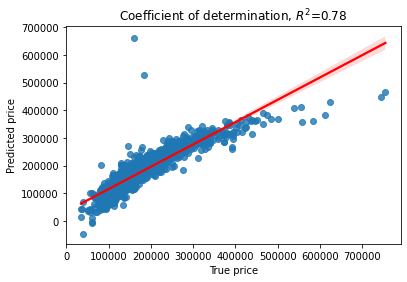

In [350]:
# Ordinary Linear Regression First
lr=LinearRegression().fit(X,y)
yhat=lr.predict(X)

# Cross_val_score and score are coefficient of determinations, R^2
RsquaredCV=cross_val_score(lr, X, y, cv=5).mean()
RsquaredTR=lr.score(X,y)

sns.regplot(x=y,y=yhat, line_kws={"color": "red"})
plt.xlabel('True price')
plt.ylabel('Predicted price')
plt.title('Coefficient of determination, $R^2$=%3.2f' % RsquaredCV)
print("CV score.......... %6.4f" % RsquaredCV)
print("Training score.... %6.4f" % RsquaredTR)
print("Training RMSE..... %6d" % rmse(yhat,y))

CV score.......... 0.7850
Training score.... 0.8023
Training RMSE.....  35310


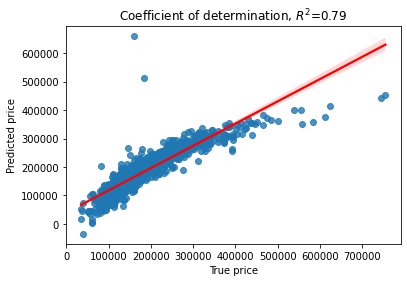

In [354]:
# Then L2 regularized Ridge Regression
rr=Ridge(alpha=170).fit(X,y)
yhat=rr.predict(X)
RsquaredCV=cross_val_score(rr, X, y, cv=5).mean()
RsquaredTR=rr.score(X,y)

sns.regplot(x=y,y=yhat, line_kws={"color": "red"})
plt.xlabel('True price')
plt.ylabel('Predicted price')
plt.title('Coefficient of determination, $R^2$=%3.2f' % RsquaredCV)
print("CV score.......... %6.4f" % RsquaredCV)
print("Training score.... %6.4f" % RsquaredTR)
print("Training RMSE..... %6d" % rmse(yhat,y))

CV score.......... 0.7759
Training score.... 0.7948
Training RMSE.....  35972


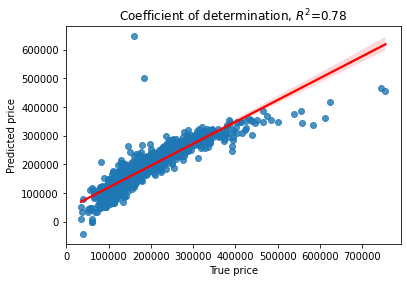

In [370]:
# L1 regularized Lasso Regerssion
la=Lasso(alpha=2000).fit(X,y)
yhat=la.predict(X)
RsquaredCV=cross_val_score(la, X, y, cv=5).mean()
RsquaredTR=la.score(X,y)

sns.regplot(x=y, y=yhat, line_kws={"color": "red"})
plt.xlabel('True price')
plt.ylabel('Predicted price')
plt.title('Coefficient of determination, $R^2$=%3.2f' % RsquaredCV)
print("CV score.......... %6.4f" % RsquaredCV)
print("Training score.... %6.4f" % RsquaredTR)
print("Training RMSE..... %6d" % rmse(yhat,y))

CV score.......... 0.7770
Training score.... 0.7858
Training RMSE.....  36758


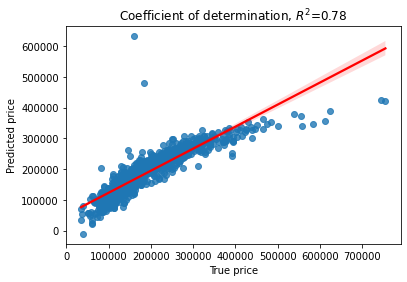

In [358]:
# L2 + L1 regularized Elastic Net
en=ElasticNet(alpha=6, l1_ratio=0.9).fit(X,y)
yhat=en.predict(X)
RsquaredCV=cross_val_score(en, X, y, cv=5).mean()
RsquaredTR=en.score(X,y)

sns.regplot(x=y, y=yhat, line_kws={"color": "red"})
plt.xlabel('True price')
plt.ylabel('Predicted price')
plt.title('Coefficient of determination, $R^2$=%3.2f' % RsquaredCV)
print("CV score.......... %6.4f" % RsquaredCV)
print("Training score.... %6.4f" % RsquaredTR)
print("Training RMSE..... %6d" % rmse(yhat,y))

CV score.......... 0.7803
Training score.... 0.7858
Training RMSE.....  35426
alpha=1.579592, L1-ratio=0.900000


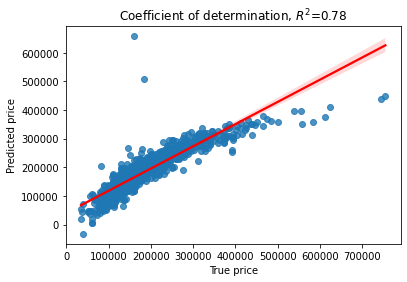

In [401]:
# Lets use Elastic Net for selecting the most relevant features
#model = LassoCV(cv=5).fit(X,y)
model = ElasticNetCV(cv=5, alphas=np.linspace(0.1,3), l1_ratio=0.9).fit(X,y)
yhat=model.predict(X)
RsquaredCV=cross_val_score(model, X, y, cv=5).mean()
RsquaredTR=en.score(X,y)
 
sns.regplot(x=y, y=yhat, line_kws={"color": "red"})
plt.xlabel('True price')
plt.ylabel('Predicted price')
plt.title('Coefficient of determination, $R^2$=%3.2f' % RsquaredCV)
print("CV score.......... %6.4f" % RsquaredCV)
print("Training score.... %6.4f" % RsquaredTR)
print("Training RMSE..... %6d" % rmse(yhat,y))
print("alpha=%f, L1-ratio=%f" % (model.alpha_, model.l1_ratio))

In [427]:
# Lets use the previous Elastic Net for selecting the most relevant features
# Features whose importance is greater or equal than the threshold are kept 
# while the others are discarded.

sfm = SelectFromModel(model, threshold=7000)
sfm.fit(X, y)

print(sfm.transform(X).shape)
print("Selected variables are", sfm.transform([Housing_noncat.columns, Housing_noncat.columns])[0])
        

(1460, 4)
Selected variables are ['OverallQual' '1stFlrSF' 'GrLivArea' 'TotRmsAbvGrd']


CV score.......... 0.7309
Training score.... 0.7381
Training RMSE.....  40644
alpha=0.159184, L1-ratio=0.900000


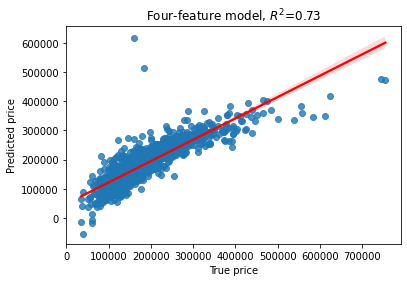

In [431]:
model.fit(sfm.transform(X), y)
yhat=model.predict(sfm.transform(X))
RsquaredCV=cross_val_score(model, sfm.transform(X), y, cv=5).mean()
RsquaredTR=model.score(sfm.transform(X),y)

sns.regplot(x=y,y=yhat, line_kws={"color": "red"})
plt.xlabel('True price')
plt.ylabel('Predicted price')
plt.title('Four-feature model, $R^2$=%3.2f' % RsquaredCV)

print("CV score.......... %6.4f" % RsquaredCV)
print("Training score.... %6.4f" % RsquaredTR)
print("Training RMSE..... %6d" % rmse(yhat,y))
print("alpha=%f, L1-ratio=%f" % (model.alpha_, model.l1_ratio))


## Gradient tree regression

The housing prize model is clearly non-linear, so the above shown linear regression models are not optimal.

CV score.......... 0.8739
Training score.... 0.9467
Training RMSE.....  18326


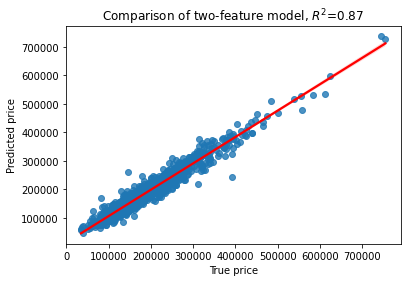

In [433]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import cross_val_score

#est = GradientBoostingRegressor(n_estimators=50, learning_rate=0.1,
#                                max_depth=2, random_state=0, loss='ls')
est = GradientBoostingRegressor(max_features=3,alpha=0.2)
est.fit(X, y)
yhat=est.predict(X)
RsquaredCV=cross_val_score(est, X, y, cv=5).mean()
RsquaredTR=est.score(X,y)

sns.regplot(x=y,y=yhat, line_kws={"color": "red"})
plt.xlabel('True price')
plt.ylabel('Predicted price')
plt.title('Comparison of two-feature model, $R^2$=%3.2f' % RsquaredCV)
print("CV score.......... %6.4f" % RsquaredCV)
print("Training score.... %6.4f" % RsquaredTR)
print("Training RMSE..... %6d" % rmse(yhat,y))

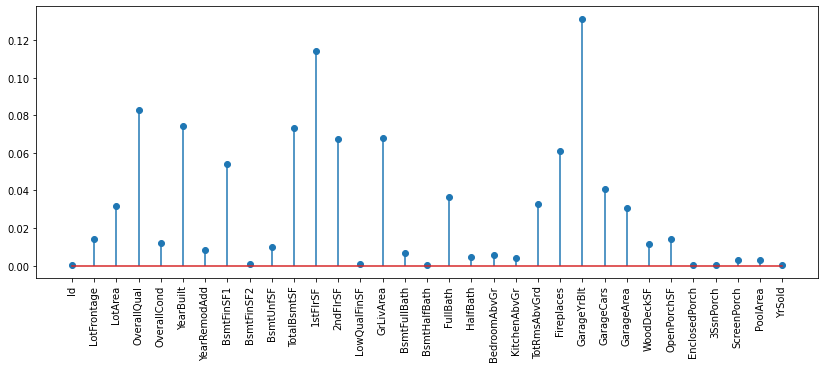

In [456]:
# Plot the importance of each feature
plt.figure(figsize=(14,5))
#Rsquared=sum((yhat-np.mean(y))**2)/sum((y-np.mean(y))**2)
i=range(len(california.feature_names))
plt.stem(est.feature_importances_)
ax=plt.gca()
ax.set_xticks(np.arange(33))
ax.set_xticklabels(Housing_noncat.columns,rotation=90);

#for i in range(len(Housing_noncat.columns)):
#    print("%2d %8s=%5.2f" % (i,Housing_noncat.columns[i], est.feature_importances_[i]))

<AxesSubplot:>

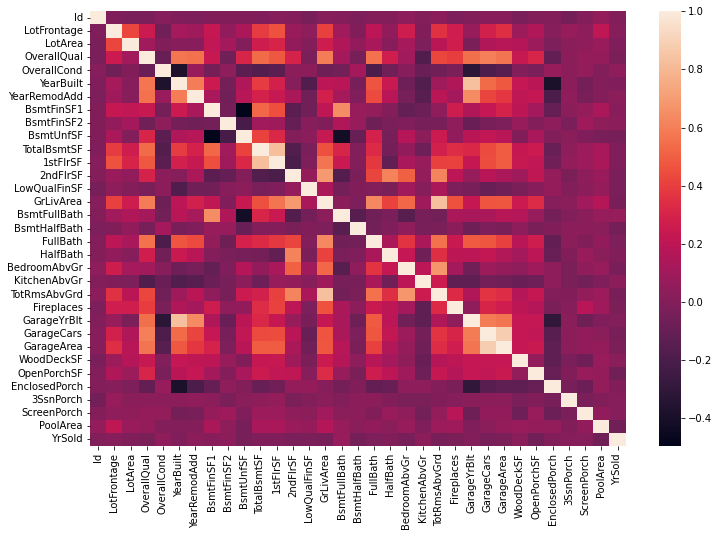

In [435]:
plt.figure(figsize=(12,8))
sns.heatmap(Housing_noncat.corr())


23 GarageYrBlt
11 1stFlrSF
3 OverallQual
5 YearBuilt
(1460, 4)
CV score.......... 0.7552
Training score.... 0.8546
Training RMSE.....  30284


GradientBoostingRegressor()

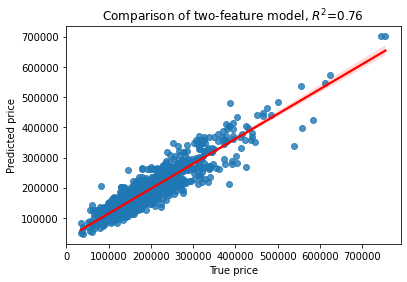

In [457]:
# Select four most important features

selected=est.feature_importances_.argsort()[-1:-5:-1]
for feature in selected:
    print(feature, Housing_noncat.columns[feature])

Xs=X[:,selected]
print(Xs.shape)

ests = GradientBoostingRegressor()
ests.fit(Xs, y)
yhat=ests.predict(Xs)
RsquaredCV=cross_val_score(ests, Xs, y, cv=5).mean()
RsquaredTR=ests.score(Xs,y)

sns.regplot(x=y, y=yhat, line_kws={"color": "red"})
plt.xlabel('True price')
plt.ylabel('Predicted price')
plt.title('Comparison of two-feature model, $R^2$=%3.2f' % RsquaredCV)

print("CV score.......... %6.4f" % RsquaredCV)
print("Training score.... %6.4f" % RsquaredTR)
print("Training RMSE..... %6d" % rmse(yhat,y))
ests


## Conclusion on housing prizes

- Data preprocessing was needed
  - Remove/encode categorical features if using regression
  - Impute missing values
- Linear model was not optimal, non-linear was better even with only four features
- Different features were selected when using linear / non-linear model
- Regularization was at least useful in variable selection (Since this data had a lot of training data, the OLS worked quite well even without regularization this time)

## Recursive feature elimination

An example of familiar digits classification

In [293]:
from sklearn.svm import SVC
from sklearn.datasets import load_digits
from sklearn.feature_selection import RFE
import matplotlib.pyplot as plt

# Load the digits dataset
digits = load_digits()
X = digits.images.reshape((len(digits.images), -1))
y = digits.target

# Create the RFE object and rank each pixel
svc = SVC(kernel="linear", C=1)
rfe = RFE(estimator=svc, n_features_to_select=1, step=1)
rfe.fit(X, y) 

RFE(estimator=SVC(C=1, kernel='linear'), n_features_to_select=1)

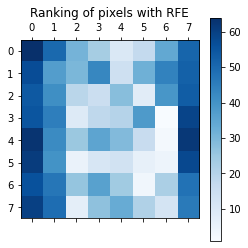

In [294]:
ranking = rfe.ranking_.reshape(digits.images[0].shape)

# Plot pixel ranking
plt.matshow(ranking, cmap=plt.cm.Blues)
plt.colorbar()
plt.title("Ranking of pixels with RFE")
plt.show()

In [295]:
rfe.ranking_.reshape(digits.images[0].shape)

array([[64, 50, 31, 23, 10, 17, 34, 51],
       [57, 37, 30, 43, 14, 32, 44, 52],
       [54, 41, 19, 15, 28,  8, 39, 53],
       [55, 45,  9, 18, 20, 38,  1, 59],
       [63, 42, 25, 35, 29, 16,  2, 62],
       [61, 40,  5, 11, 13,  6,  4, 58],
       [56, 47, 26, 36, 24,  3, 22, 48],
       [60, 49,  7, 27, 33, 21, 12, 46]])

## Summary

- **Classical regression** is simple and well understood, and is a good model, when its conditions are met
    - The number of features is much less than number of samples
    - There is not too much noise in the data
    - The linear model is sufficient
    - Data needs to be normalized before use
    - Categorical data is not well supported, at least needs to be converted to numerical for example using one hot encoding
 - **Regularisation** includes many methods for balancing the trade off between model complexity and prediction error which prevents against over-fitting of the model
    - Regularization is often used in two forms: **L2**-regularization minimises the squared sum of model parameters, **L1**-regularization minimises the absolute sum of the model parameters.
- Non-linear regression models **SVR, RFR, GBRT** extend the regression to non-linear problems
- **Ensemble models** include a bag (parallel) or boosted (serial) combination of many simple models, which are randomized (bag) or boosted versions of simple regressors
    - Extratrees and Gradient Boosted Regression Trees can also use categorical data directly and they do not need the normalization of data
- Recursive feature elimination (**RFE**)/addition are useful methods for model optimisation and feature selection 
- The feature importances measure in RF and GBTR models provides a clue for the importance of features
- **R2-score** and **RMSE** are typical measures for model performance
